## SED stats & plots

- Read SYNAGE++ results
- Plot SED and models


In [23]:
import numpy as np
import shutil
from astropy.io import ascii, fits
import aplpy
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, LogLocator
from matplotlib import transforms as mtransforms
from matplotlib.ticker import LogFormatterExponent # <-- one new import here

FA_radeg = 50.673825
FA_decdeg = -37.208227

BeamRa = 51.199614
BeamDec = -37.617858
#rootDir = '/home/maccagni/Projects/MFS/FornaxA/contData/'
rootDir = '/Users/maccagni/Projects/MFS/FornaxA/contData/'

figDir = rootDir+'contFigs/'



print '''\t+---------+\n\t Inputs loaded\n\t+---------+'''


	+---------+
	 Inputs loaded
	+---------+


In [8]:
#-------------------------------------------------#
# Plot SED
#-------------------------------------------------#
def spIndex(a, b,outSpixPlot,title,BeamSize,contours):

    params = {'font.family'         :' serif',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 24.0,
              'axes.linewidth'      : 2,
              'lines.linewidth'     : 2,
              'xtick.labelsize'     : 24,
              'ytick.labelsize'     : 24, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.major.size'    : 9,
              'xtick.major.width'   : 2,
              'xtick.minor.size'    : 6,
              'xtick.minor.width'   : 2,
              'ytick.major.size'    : 9,
              'ytick.major.width'   : 2,
              'ytick.minor.size'    : 6,
              'ytick.minor.width'   : 2, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    #plot image
    fig = plt.figure(figsize=(12, 12))

    #plot image
    f22 = fits.getdata(a, ext=0)
    img = plt.imshow(f22, cmap="jet_r",vmin=-0.2,vmax=-1.4)
    plt.gca().set_visible(False)
    cax = plt.axes([0.905, 0.08, 0.015, 0.775])
    cbar = plt.colorbar(cax=cax)
    ax = cbar.ax
    ax.text(4.8,0.5,r'-$\delta$',rotation=90)
    
    f4 = aplpy.FITSFigure(a, figure=fig, subplot=[0.12,0.08,0.775,0.775])
    f4.show_colorscale(aspect='equal', cmap='jet_r',vmax=-0.2,vmin=-1.4)
    f4.frame.set_linewidth(3)
    f4.recenter(FA_radeg,FA_decdeg,width=1.,height=1.)

    #f4.set_title('Break frequency map')

    f4.tick_labels.set_font( weight='book', \
                             stretch='normal', family='serif', \
                             style='normal', variant='normal',size=21) 
    f4.axis_labels.set_font( weight='medium', \
                            stretch='semi-expanded', family='serif', \
                             style='normal', variant='normal',size=24)

    f4.tick_labels.set_xformat('hh:mm')

    f4.tick_labels.set_yformat('dd:mm')

    f4.axis_labels.set_xtext('Ra (J2000)')
    f4.axis_labels.set_ytext('Dec (J2000)')

    f4.ticks.set_color('k')
    f4.ticks.set_length(9)  # points
    f4.ticks.set_linewidth(3)  # points
    f4.ticks.set_minor_frequency(3)
    f4.ticks.show()
    f4.set_title(title)
    f4.show_contour(b,levels=contours, colors='black',lw=1,ls='.')

    #f4.add_colorbar()
    #f4.colorbar.set_box([0.91, 0.08, 0.015, 0.85], box_orientation='vertical')
    #f4.colorbar.set_ticks([-0.2,-0.4,-0.6,-0.8,-1.0,-1.2,-1.4,-1.6,-1.8])
    #f4.colorbar.set_frame_linewidth(1)
    #f4.colorbar.set_pad(0.2)
    #f4.colorbar.set_axis_label_font(size=24)
    #f4.colorbar.set_axis_label_text(r'$-\delta$')
    #f4.colorbar.set_font( weight='medium', \
    #                      stretch='semi-expanded', family='serif', \
    #                      style='normal', variant='normal',size=24)


    #
    f4.show_ellipses(BeamRa, BeamDec, BeamSize/3600., BeamSize/3600., angle=0, edgecolor='black',linewidth=2)

    #fig.tight_layout()

    fig.savefig(outSpixPlot,format='png',overwrite=True)


    print '\n\t-----> Loaded <-----'

In [9]:
#-------------------------------------------------#
# Plot SED
#-------------------------------------------------#
def spIndexReg(a, b,outSpixPlot,title,BeamSize,contours):

    params = {'font.family'         :' serif',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 24.0,
              'axes.linewidth'      : 2,
              'lines.linewidth'     : 2,
              'xtick.labelsize'     : 24,
              'ytick.labelsize'     : 24, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.major.size'    : 9,
              'xtick.major.width'   : 2,
              'xtick.minor.size'    : 6,
              'xtick.minor.width'   : 2,
              'ytick.major.size'    : 9,
              'ytick.major.width'   : 2,
              'ytick.minor.size'    : 6,
              'ytick.minor.width'   : 2, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    fig = plt.figure(figsize=(12, 12))

    #plot image
    f22 = fits.getdata(a, ext=0)
    img = plt.imshow(f22, cmap="jet_r",vmin=-0.2,vmax=-1.4)
    plt.gca().set_visible(False)
    cax = plt.axes([0.905, 0.08, 0.015, 0.775])
    cbar = plt.colorbar(cax=cax)
    ax = cbar.ax
    ax.text(4.8,0.5,r'-$\delta$',rotation=90)
    

    f4 = aplpy.FITSFigure(a, figure=fig, subplot=[0.12,0.08,0.775,0.775])
    f4.show_colorscale(aspect='equal', cmap='jet_r',vmax=-0.2,vmin=-1.4)
    f4.frame.set_linewidth(3)
    f4.recenter(FA_radeg,FA_decdeg,width=1.,height=1.)

    #f4.set_title('Break frequency map')

    f4.tick_labels.set_font( weight='book', \
                             stretch='normal', family='serif', \
                             style='normal', variant='normal',size=21) 
    f4.axis_labels.set_font( weight='medium', \
                            stretch='semi-expanded', family='serif', \
                             style='normal', variant='normal',size=24)

    f4.tick_labels.set_xformat('hh:mm')

    f4.tick_labels.set_yformat('dd:mm')

    f4.axis_labels.set_xtext('Ra (J2000)')
    f4.axis_labels.set_ytext('Dec (J2000)')

    f4.ticks.set_color('k')
    f4.ticks.set_length(9)  # points
    f4.ticks.set_linewidth(3)  # points
    f4.ticks.set_minor_frequency(3)
    f4.ticks.show()
    f4.set_title(title)
    f4.show_contour(b,levels=contours, colors='black',lw=1,ls='.')

    #f4.add_colorbar()
    #f4.colorbar.set_box([0.91, 0.08, 0.015, 0.85], box_orientation='vertical')
    #f4.colorbar.set_ticks([-0.2,-0.4,-0.6,-0.8,-1.0,-1.2,-1.4,-1.6,-1.8])
    #f4.colorbar.set_frame_linewidth(1)
    #f4.colorbar.set_pad(0.2)
    #f4.colorbar.set_axis_label_font(size=24)
    #f4.colorbar.set_axis_label_text(r'-$\delta$')
    #f4.colorbar.set_font( weight='medium', \
    #                      stretch='semi-expanded', family='serif', \
    #                      style='normal', variant='normal',size=24)

    f4.show_regions(rootDir+'inIms/regions/diff_regions/Enorth.reg')
    f4.show_regions(rootDir+'inIms/regions/diff_regions/Ehot.reg')
    f4.show_regions(rootDir+'inIms/regions/diff_regions/Ejet.reg')
    f4.show_regions(rootDir+'inIms/regions/diff_regions/Esouth.reg')
    f4.show_regions(rootDir+'inIms/regions/diff_regions/Ecentre.reg')
    f4.show_regions(rootDir+'inIms/regions/diff_regions/bridge.reg')
    f4.show_regions(rootDir+'inIms/regions/diff_regions/Wcentre.reg')
    f4.show_regions(rootDir+'inIms/regions/diff_regions/Wcentre2.reg')

    #f4.show_regions(rootDir+'inIms/regions/diff_regions/Wjet.reg')
    f4.show_regions(rootDir+'inIms/regions/diff_regions/Whot.reg')
    f4.show_regions(rootDir+'inIms/regions/diff_regions/Wnorth.reg')
    f4.show_regions(rootDir+'inIms/regions/diff_regions/Wsouth.reg')

    f4.show_ellipses(BeamRa, BeamDec, BeamSize/3600., BeamSize/3600., angle=0, edgecolor='black',linewidth=2)

    #fig.tight_layout()

    fig.savefig(outSpixPlot,format='png',overwrite=True)


    print '\n\t-----> Loaded <-----'


	-----> Loaded <-----

	-----> Loaded <-----


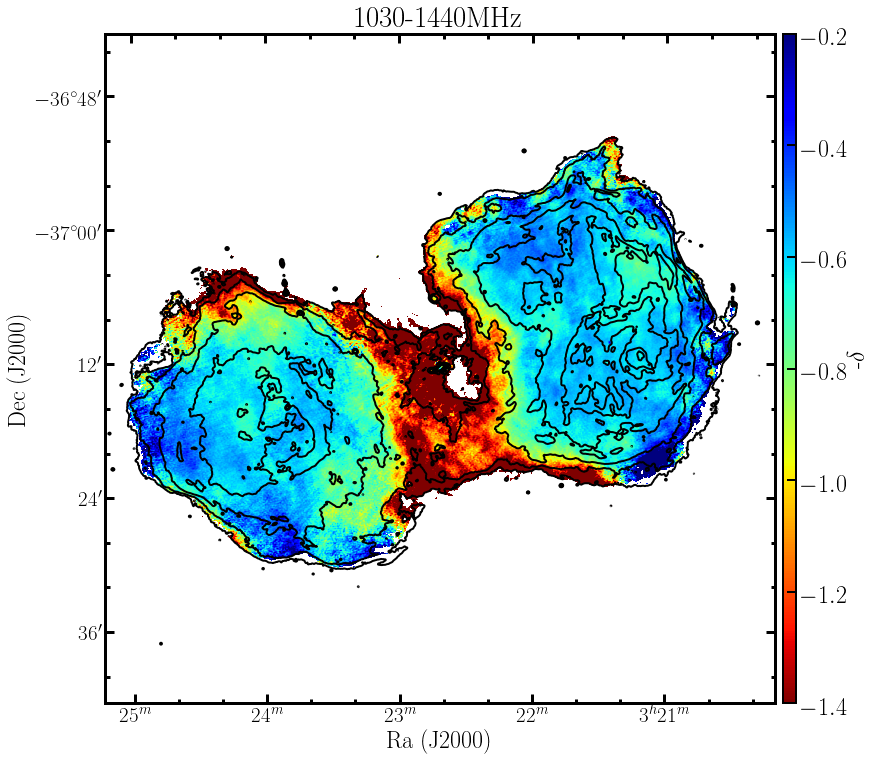

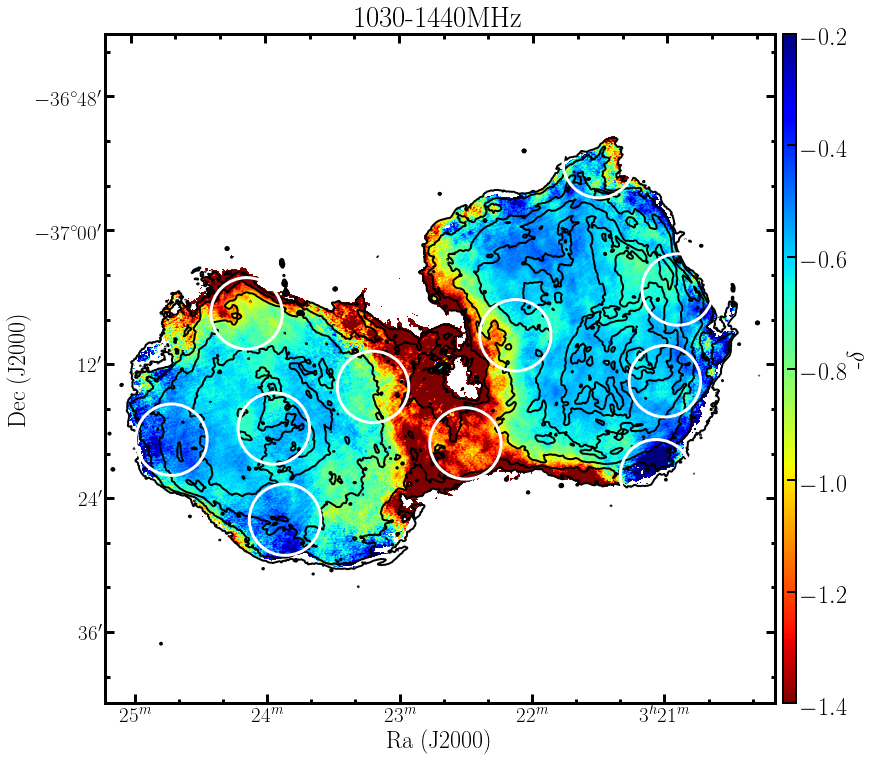

In [10]:
spixMap = rootDir+'synMaps/spIxMaps/Spix_1030-1440MHz_beam_mult_maskCut.fits'
outSpixPlot = figDir+'Spix_1030-1440MHz_beam.png'
contMap = rootDir+'inIms/CONVL/CONVLMB_Meer_1440MHz_div_bt32_maskCut.fits'
contours = [4e-4,8e-4,2e-3,4.5e-3,7.5e-3,1.e-2]
spIndex(spixMap,contMap,outSpixPlot,'1030-1440MHz',10.,contours)

outSpixPlot = figDir+'Spix_1030-1440MHzReg_beam.png'

spIndexReg(spixMap,contMap,outSpixPlot,'1030-1440MHz',10.,contours)


	-----> Loaded <-----

	-----> Loaded <-----

	-----> Loaded <-----

	-----> Loaded <-----

	-----> Loaded <-----

	-----> Loaded <-----

	-----> Loaded <-----


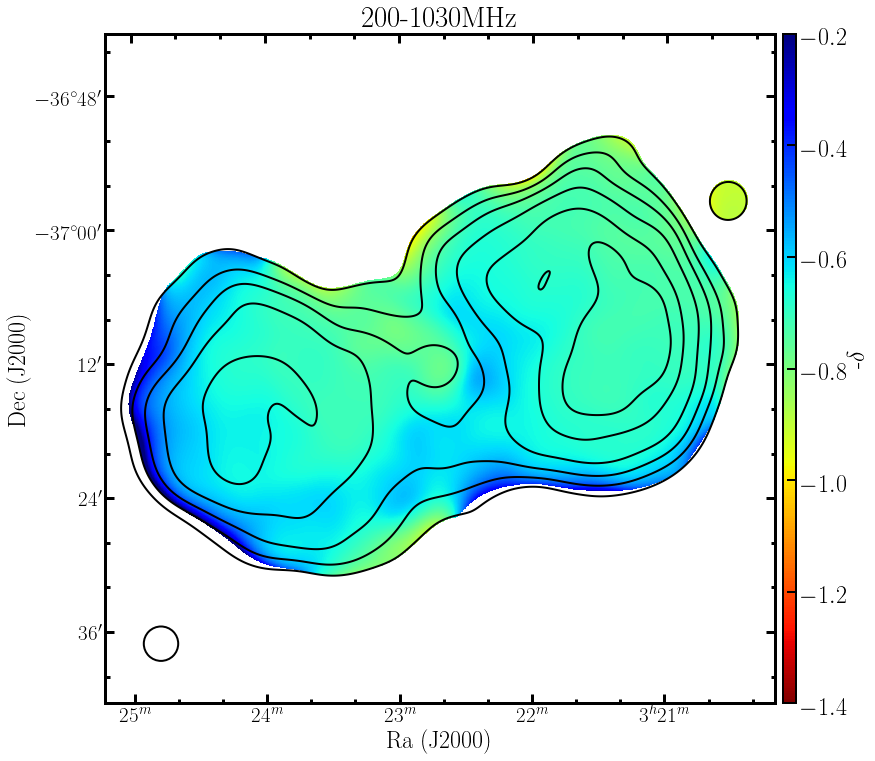

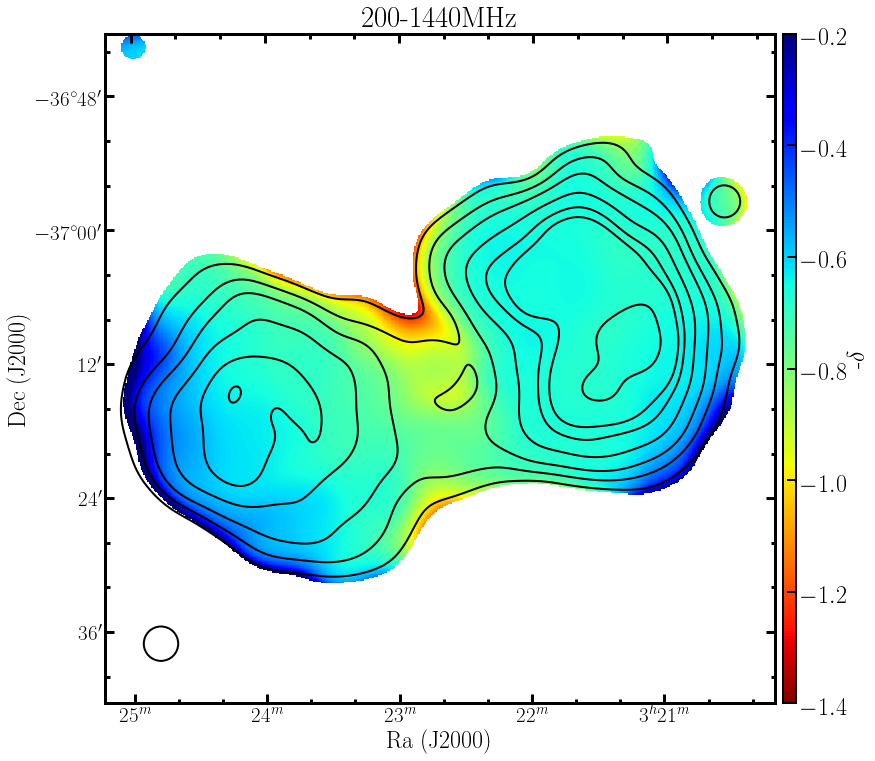

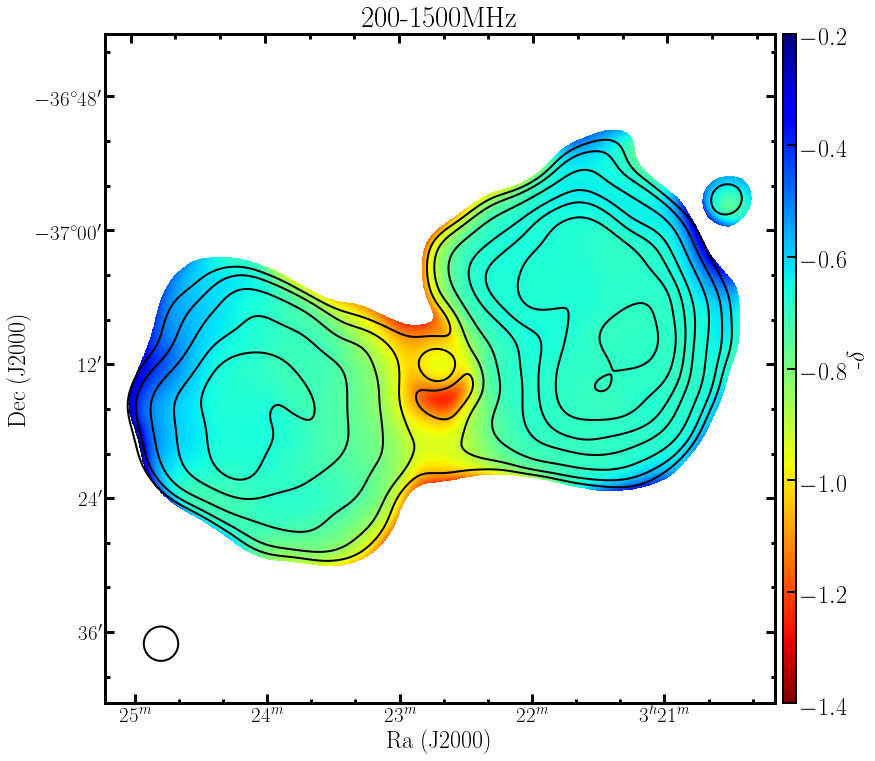

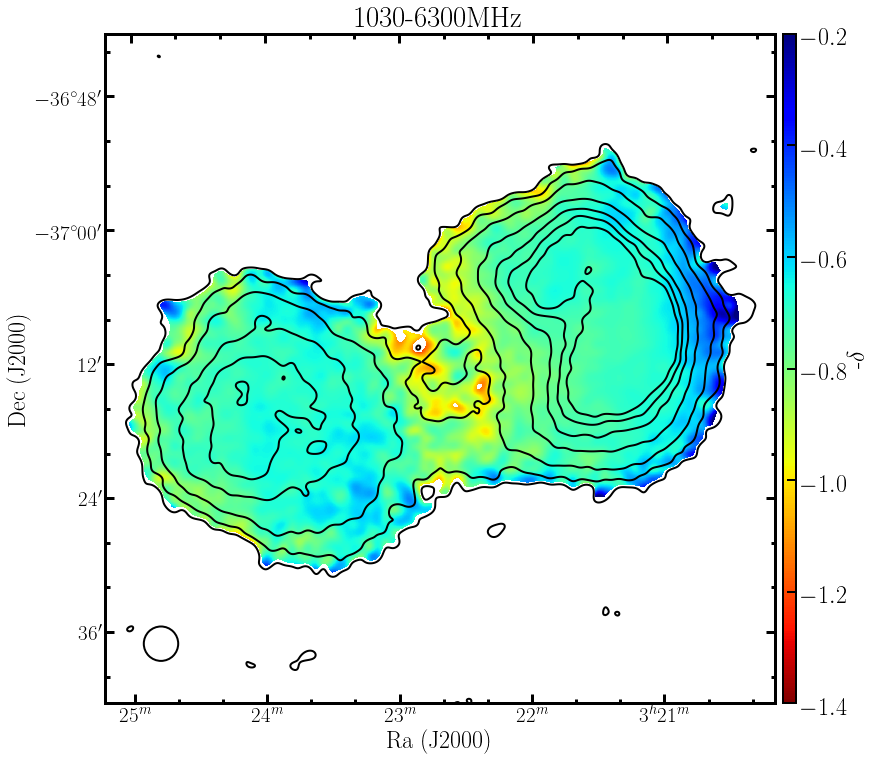

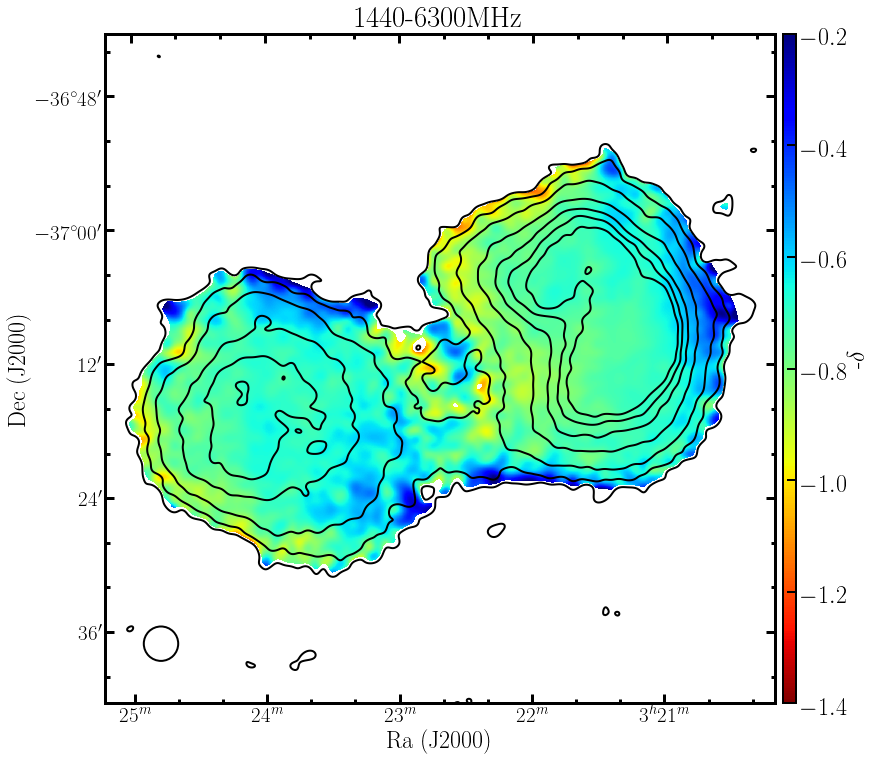

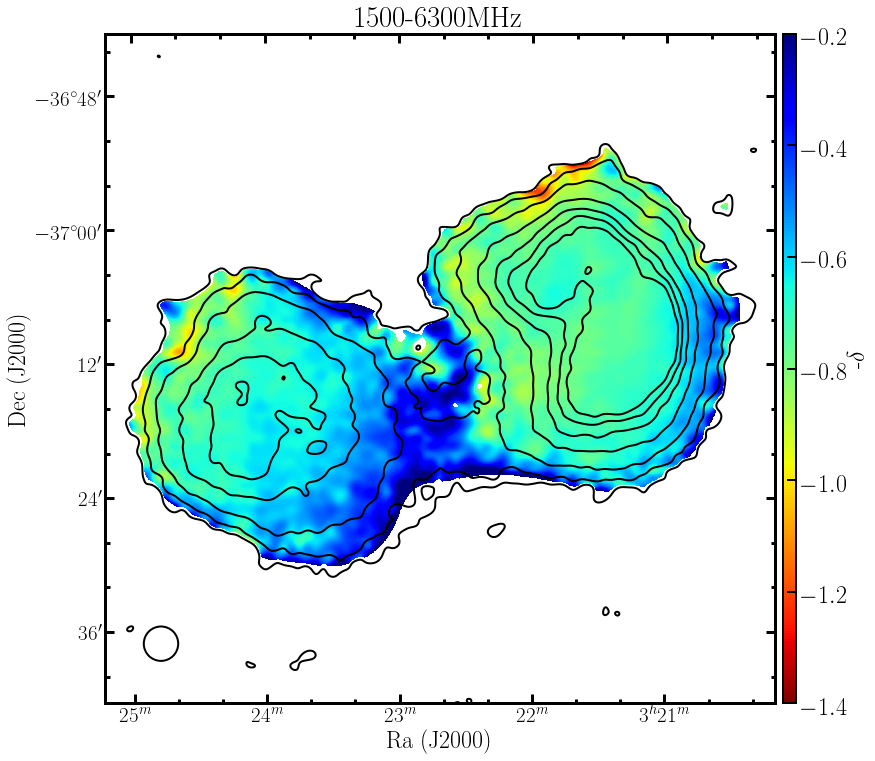

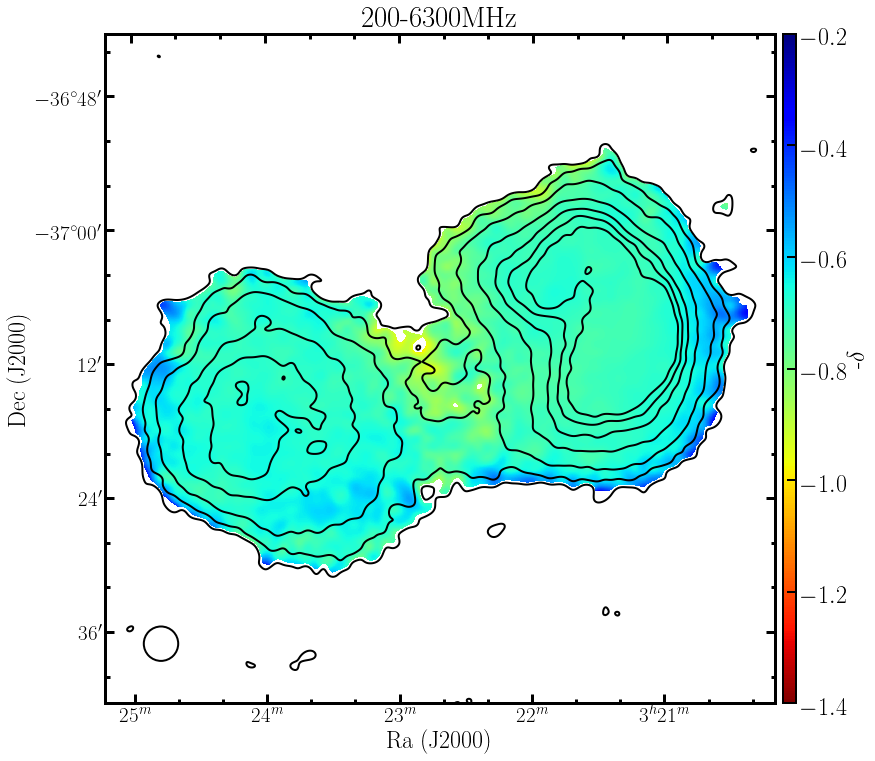

In [7]:
spixMap = rootDir+'synMaps/spIxMaps/Spix_200-1030MHz_mult.fits'
outSpixPlot = figDir+'Spix_200-1030MHz.png'
contMap = rootDir+'inIms/CONVL/CONVLS_Meer_1030MHz_div_bt32.fits'
contours = [0.1,0.25,0.5,1.,2.,3.]

spIndex(spixMap,contMap,outSpixPlot,'200-1030MHz',185.,contours)

spixMap = rootDir+'synMaps/spIxMaps/Spix_200-1440MHz_mult.fits'
outSpixPlot = figDir+'Spix_200-1440MHz.png'
contMap = rootDir+'inIms/CONVL/CONVLS_Meer_1440MHz_div_bt32.fits'
contours = [0.1,0.25,0.5,1.,1.6,2.,3.,3.5]

spIndex(spixMap,contMap,outSpixPlot,'200-1440MHz',185.,contours)

spixMap = rootDir+'synMaps/spIxMaps/Spix_200-1500MHz_mult.fits'
outSpixPlot = figDir+'Spix_200-1500MHz.png'
contMap = rootDir+'inIms/CONVL/CONVLS_VLA_1500MHz_bt32.fits'
contours = [0.15,0.25,0.5,1.,1.5,2.1,3.,3.5]

spIndex(spixMap,contMap,outSpixPlot,'200-1500MHz',185.,contours)


spixMap = rootDir+'synMaps/spIxMaps/Spix_1030-6300MHz_VLAgrid_mult.fits'
contMap = rootDir+'inIms/CONVL/CONVLS_SRT_6300MHz_bt32_corr.fits'
contours = [0.05,0.1,0.2,0.4,0.58,0.7,0.8]

outSpixPlot = figDir+'Spix_1030-6300MHz.png'

spIndex(spixMap,contMap,outSpixPlot,'1030-6300MHz',185.,contours)


spixMap = rootDir+'synMaps/spIxMaps/Spix_1440-6300MHz_VLAgrid_mult.fits'

outSpixPlot = figDir+'Spix_1440-6300MHz.png'
spIndex(spixMap,contMap,outSpixPlot,'1440-6300MHz',185.,contours)



spixMap = rootDir+'synMaps/spIxMaps/Spix_1500-6300MHz_mult.fits'
outSpixPlot = figDir+'Spix_1500-6300MHz.png'
spIndex(spixMap,contMap,outSpixPlot,'1500-6300MHz',185.,contours)


spixMap = rootDir+'synMaps/spIxMaps/Spix_200-6300MHz_mult.fits'
outSpixPlot = figDir+'Spix_200-6300MHz.png'
#contMap = rootDir+'inIms/CONVL/CONVLS_MWA_200MHz_bt32_corr.fits'
#contours = [0.1,0.25,0.5,1.,1.6,2.,3.,3.5]

spIndex(spixMap,contMap,outSpixPlot,'200-6300MHz',185.,contours)




In [26]:
#-------------------------------------------------#
# Plot SED
#-------------------------------------------------#
def spIndexZoom(a, b,outSpixPlot,title,BeamSize,contours):

    params = {'font.family'         :' serif',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 24.0,
              'axes.linewidth'      : 2,
              'lines.linewidth'     : 2,
              'xtick.labelsize'     : 24,
              'ytick.labelsize'     : 24, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.major.size'    : 9,
              'xtick.major.width'   : 2,
              'xtick.minor.size'    : 6,
              'xtick.minor.width'   : 2,
              'ytick.major.size'    : 9,
              'ytick.major.width'   : 2,
              'ytick.minor.size'    : 6,
              'ytick.minor.width'   : 2, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    #plot image    

    fig = plt.figure(figsize=(12, 12))

    f22 = fits.getdata(a, ext=0)
    img = plt.imshow(f22, cmap="jet_r",vmin=-0.2,vmax=-1.4)
    plt.gca().set_visible(False)
    cax = plt.axes([0.905, 0.08, 0.015, 0.775])
    cbar = plt.colorbar(cax=cax)
    ax = cbar.ax
    ax.text(4.8,0.5,r'-$\delta$',rotation=90)
    

    f4 = aplpy.FITSFigure(a, figure=fig, subplot=[0.12,0.08,0.775,0.775])


    f4.show_colorscale(aspect='equal', cmap='jet_r',vmax=-0.2,vmin=-1.4)
    f4.frame.set_linewidth(3)
    f4.recenter(FA_radeg,FA_decdeg,width=140./3600.,height=135./3600.)

    #f4.set_title('Break frequency map')

    f4.tick_labels.set_font( weight='book', \
                             stretch='normal', family='serif', \
                             style='normal', variant='normal',size=21) 
    f4.axis_labels.set_font( weight='medium', \
                            stretch='semi-expanded', family='serif', \
                             style='normal', variant='normal',size=24)
 
    f4.set_title(title)
    f4.show_contour(b,levels=contours, colors='black',lw=1,ls='.')

    
    
    f4.tick_labels.set_xformat('hh:mm:ss')

    f4.tick_labels.set_yformat('dd:mm')

    f4.axis_labels.set_xtext('Ra (J2000)')
    f4.axis_labels.set_ytext('Dec (J2000)')

    f4.ticks.set_color('k')
    f4.ticks.set_length(9)  # points
    f4.ticks.set_linewidth(3)  # points
    f4.ticks.set_minor_frequency(3)
    f4.ticks.show()


    #f4.add_colorbar()
    #f4.colorbar.set_box([0.91, 0.08, 0.015, 0.85], box_orientation='vertical')
    #f4.colorbar.set_ticks([-0.2,-0.4,-0.6,-0.8,-1.0,-1.2,-1.4,-1.6,-1.8])
    #f4.colorbar.set_frame_linewidth(1)
    #f4.colorbar.set_pad(0.2)
    #f4.colorbar.set_axis_label_font(size=24)
    #f4.colorbar.set_axis_label_text(r'$\delta$')
    #f4.colorbar.set_font( weight='medium', \
    #                     stretch='semi-expanded', family='serif', \
    #                      style='normal', variant='normal',size=24)


    f4.show_ellipses(BeamRaCtr, BeamDecCtr, BeamSize/3600., BeamSize/3600., angle=0, edgecolor='black',linewidth=2)

    fig.tight_layout()

    fig.savefig(outSpixPlot,format='png',overwrite=True)


    print '\n\t-----> Loaded <-----'


	-----> Loaded <-----


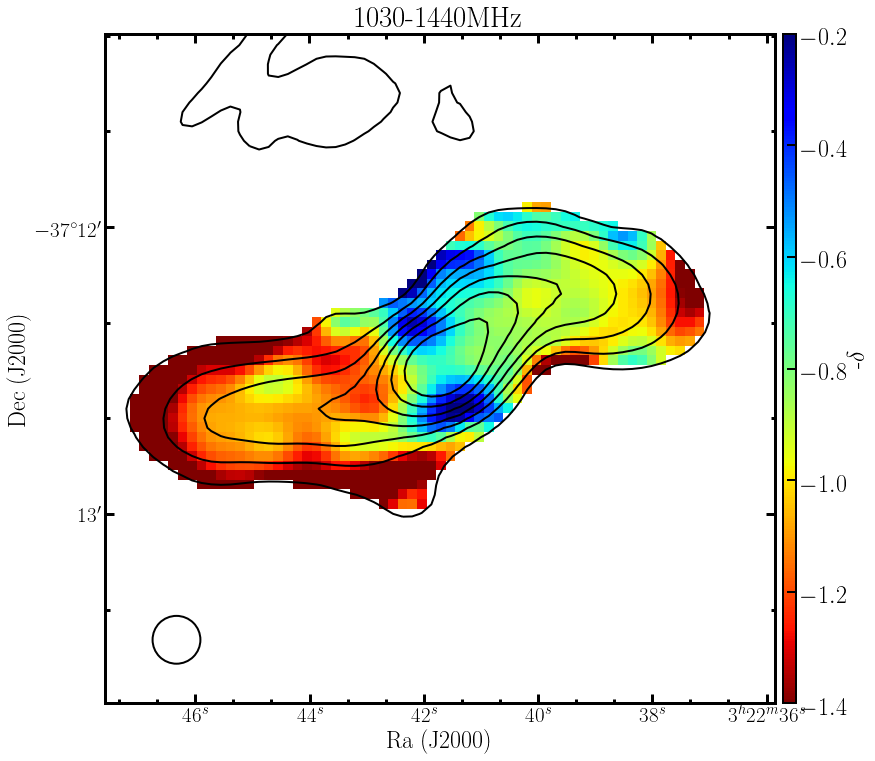

In [27]:
FA_radeg = 50.673825
FA_decdeg = -37.208227
BeamRaCtr = 50.693035
BeamDecCtr = -37.223974

spixMap = rootDir+'synMaps/spIxMaps/Spix_1030-1440MHz_Ctr_mult.fits'
outSpixPlot = figDir+'Spix_1030-1440MHzCtrBeam.png'
contMap = rootDir+'inIms/CONVL/CONVLMB_Meer_1440MHz_div_bt32_maskCut.fits'
contours = [8e-4,1.5e-3,3.0e-3,6.0e-3,1.2e-2,2.4e-2,4.8e-2]
spIndexZoom(spixMap,contMap,outSpixPlot,'1030-1440MHz',10.,contours)

In [34]:
def breakMap(a, b,outSpixPlot,title,BeamSize,contours):

    params = {'font.family'         :' serif',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 24.0,
              'axes.linewidth'      : 2,
              'lines.linewidth'     : 2,
              'xtick.labelsize'     : 24,
              'ytick.labelsize'     : 24, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.major.size'    : 9,
              'xtick.major.width'   : 2,
              'xtick.minor.size'    : 6,
              'xtick.minor.width'   : 2,
              'ytick.major.size'    : 9,
              'ytick.major.width'   : 2,
              'ytick.minor.size'    : 6,
              'ytick.minor.width'   : 2, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    #plot image

    fig = plt.figure(figsize=(12, 12))

    f22 = fits.getdata(a, ext=0)
    img = plt.imshow(f22, cmap="jet_r",vmin=1,vmax=300)
    plt.gca().set_visible(False)
    cax = plt.axes([0.905, 0.08, 0.015, 0.775])
    cbar = plt.colorbar(cax=cax)
    ax = cbar.ax
    ax.text(5.1,0.5,r'$\nu_{\rm break}$ [GHz]',rotation=90)
    

    f4 = aplpy.FITSFigure(a, figure=fig, subplot=[0.12,0.08,0.775,0.775])
    
    f4.show_colorscale(aspect='equal', cmap='jet_r',stretch='log',vmax=3e2,vmid=1e-1,vmin=1)
    f4.frame.set_linewidth(3)
    f4.recenter(FA_radeg,FA_decdeg,width=1.,height=1.)

    #f4.set_title('Break frequency map')

    f4.tick_labels.set_font( weight='book', \
                             stretch='normal', family='serif', \
                             style='normal', variant='normal',size=21) 
    f4.axis_labels.set_font( weight='medium', \
                            stretch='semi-expanded', family='serif', \
                             style='normal', variant='normal',size=24)

    f4.tick_labels.set_xformat('hh:mm')

    f4.tick_labels.set_yformat('dd:mm')

    f4.axis_labels.set_xtext('Ra (J2000)')
    f4.axis_labels.set_ytext('Dec (J2000)')

    f4.ticks.set_color('k')
    f4.ticks.set_length(9)  # points
    f4.ticks.set_linewidth(3)  # points
    f4.ticks.set_minor_frequency(3)
    f4.ticks.show()
    f4.set_title(title)
    f4.show_contour(b,levels=contours, colors='black',lw=1,ls='.')

    #f4.add_colorbar()
    #f4.colorbar.set_box([0.91, 0.08, 0.015, 0.85], box_orientation='vertical')
    #f4.colorbar.formatter = LogFormatterExponent(base=10) # 10 is the default
    #f4.colorbar.set_ticks([1,10,50,100,300])
    #f4.colorbar.set_tick_labels(['1','10','100'])

    #f4.colorbar.set_frame_linewidth(1)
    #f4.colorbar.set_pad(0.2)
    #f4.colorbar.set_axis_label_font(size=24)
    #f4.colorbar.set_axis_label_text(r'$\nu_{\rm break}$ [GHz]')
    #f4.colorbar.set_font( weight='medium', \
    #                      stretch='semi-expanded', family='serif', \
    #                      style='normal', variant='normal',size=24)
    #f4.colorbar.formatter = LogFormatterExponent(base=10) # 10 is the default
    #f4.colorbar.update_ticks()

    f4.show_ellipses(BeamRa, BeamDec, BeamSize/3600., BeamSize/3600., angle=0, edgecolor='black',linewidth=2)

    fig.tight_layout()

    fig.savefig(outSpixPlot,format='png',overwrite=True)


    print '\n\t-----> Loaded <-----'
def breakMapZoom(a, b,outSpixPlot,title,BeamSize,contours):

    params = {'font.family'         :' serif',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 24.0,
              'axes.linewidth'      : 2,
              'lines.linewidth'     : 2,
              'xtick.labelsize'     : 24,
              'ytick.labelsize'     : 24, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.major.size'    : 9,
              'xtick.major.width'   : 2,
              'xtick.minor.size'    : 6,
              'xtick.minor.width'   : 2,
              'ytick.major.size'    : 9,
              'ytick.major.width'   : 2,
              'ytick.minor.size'    : 6,
              'ytick.minor.width'   : 2, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    #plot image

    fig = plt.figure(figsize=(12, 12))

    f22 = fits.getdata(a, ext=0)
    img = plt.imshow(f22, cmap="jet_r",vmin=1,vmax=300)
    plt.gca().set_visible(False)
    cax = plt.axes([0.905, 0.08, 0.015, 0.775])
    cbar = plt.colorbar(cax=cax)
    ax = cbar.ax
    ax.text(5.1,0.5,r'$\nu_{\rm break}$ [GHz]',rotation=90)
    
    
    f4 = aplpy.FITSFigure(a, figure=fig, subplot=[0.12,0.08,0.775,0.775])
    f4.show_colorscale(aspect='equal', cmap='jet_r',stretch='log',vmax=3e2,vmid=1e-1,vmin=1)
    f4.frame.set_linewidth(3)
    f4.recenter(FA_radeg,FA_decdeg,width=140./3600.,height=135./3600.)

    #f4.set_title('Break frequency map')

    f4.tick_labels.set_font( weight='book', \
                             stretch='normal', family='serif', \
                             style='normal', variant='normal',size=21) 
    f4.axis_labels.set_font( weight='medium', \
                            stretch='semi-expanded', family='serif', \
                             style='normal', variant='normal',size=24)

    f4.tick_labels.set_xformat('hh:mm:ss')

    f4.tick_labels.set_yformat('dd:mm')

    f4.axis_labels.set_xtext('Ra (J2000)')
    f4.axis_labels.set_ytext('Dec (J2000)')

    f4.ticks.set_color('k')
    f4.ticks.set_length(9)  # points
    f4.ticks.set_linewidth(3)  # points
    f4.ticks.set_minor_frequency(3)
    f4.ticks.show()
    f4.set_title(title)
    f4.show_contour(b,levels=contours, colors='black',lw=1,ls='.')

    #f4.add_colorbar()
    #f4.colorbar.set_box([0.91, 0.08, 0.015, 0.85], box_orientation='vertical')
    #f4.colorbar.formatter = LogFormatterExponent(base=10) # 10 is the default
    #f4.colorbar.set_ticks([1,10,50,100,300])
    #f4.colorbar.set_tick_labels(['1','10','100'])

    #f4.colorbar.set_frame_linewidth(1)
    #f4.colorbar.set_pad(0.2)
    #f4.colorbar.set_axis_label_font(size=24)
    #f4.colorbar.set_axis_label_text(r'$\nu_{\rm break}$ [GHz]')
    #f4.colorbar.set_font( weight='medium', \
    #                      stretch='semi-expanded', family='serif', \
    #                      style='normal', variant='normal',size=24)
    #f4.colorbar.formatter = LogFormatterExponent(base=10) # 10 is the default
    #f4.colorbar.update_ticks()

    f4.show_ellipses(BeamRaCtr, BeamDecCtr, BeamSize/3600., BeamSize/3600., angle=0, edgecolor='black',linewidth=2)

    fig.tight_layout()

    fig.savefig(outSpixPlot,format='png',overwrite=True)


    print '\n\t-----> Loaded <-----'


	-----> Loaded <-----

	-----> Loaded <-----


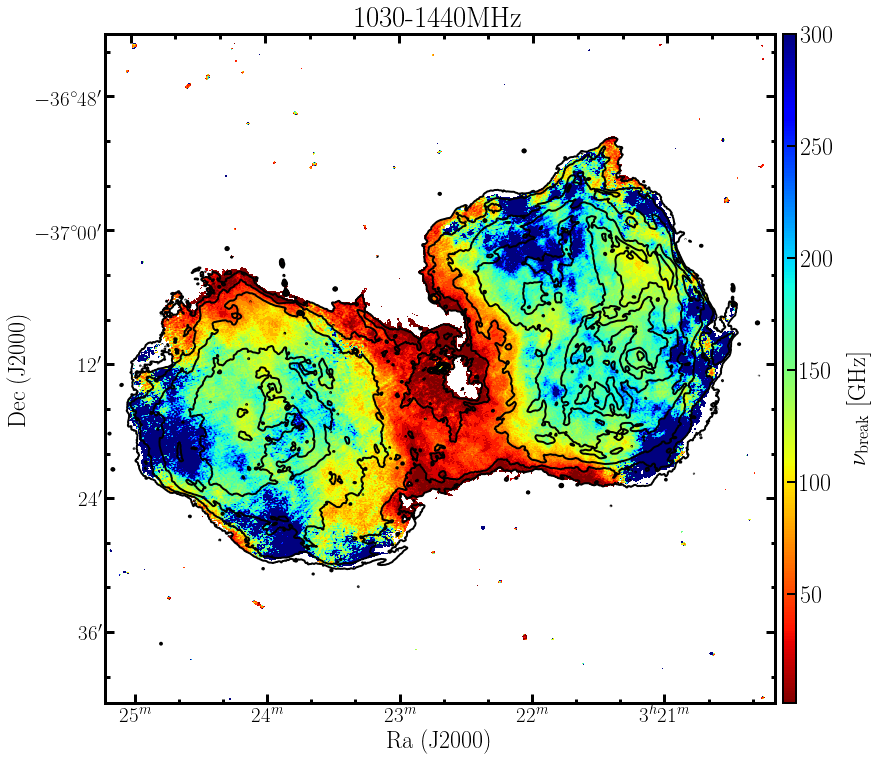

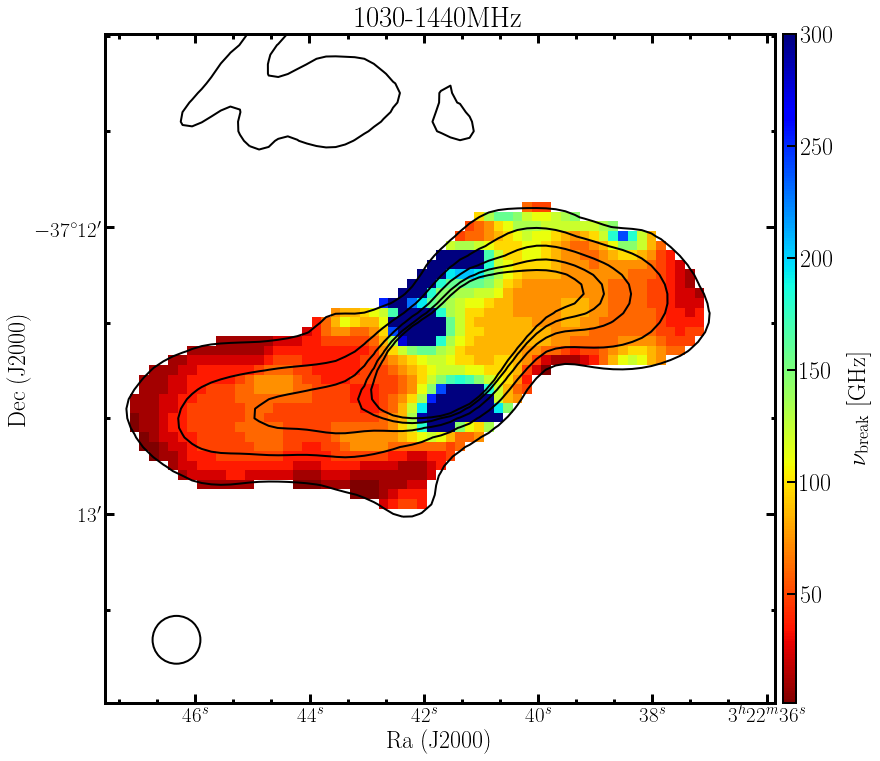

In [35]:
spixMap = rootDir+'synMaps/breakMaps/JPBREAK_BREAK.FITS_mult_maskCut.fits'
outSpixPlot = figDir+'BreakMap.png'
contMap = rootDir+'inIms/CONVL/CONVLMB_Meer_1440MHz_div_bt32_maskCut.fits'
contours = [4e-4,8e-4,2e-3,4.5e-3,7.5e-3,1.e-2]
breakMap(spixMap,contMap,outSpixPlot,'1030-1440MHz',10.,contours)

#outSpixPlot = figDir+'Spix_1030-1440MHzReg_beam.png'
spixMap = rootDir+'synMaps/breakMaps/JPBREAK_BREAK_core_mult.fits'
outSpixPlot = figDir+'BreakMap_core.png'
contMap = rootDir+'inIms/CONVL/CONVLMB_Meer_1440MHz_div_bt32_maskCut.fits'
contours = [8e-4,2e-3,4.5e-3,7.5e-3,1.e-2]
breakMapZoom(spixMap,contMap,outSpixPlot,'1030-1440MHz',10.,contours)
#spIndexReg(spixMap,contMap,outSpixPlot,'1030-1440MHz',10.,contours)